# Reunion Island is a shark attack spot!

 According to the International Shark Attack File, from 2011 (when the island began to experience an increase in negative shark/human interaction rates) until 2016, Reunion Island was the location for 16% of the world’s fatal shark attacks – 7 out of 43 –  the same amount as South Africa, a country that is almost 500 times the size of Reunion and has 70 times more inhabitants.
 
https://surfsimply.com/interviews/a-reunion-of-sharks/

### Libraries and opening the file:
First, let's import the libraries we need. After that, we will open the file:

In [1]:
# Interesting info: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [38]:
import chardet
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
with open('./input/global_shark_attacks.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


df = pd.read_csv('./input/global_shark_attacks.csv', encoding=result['encoding'])

In [4]:
df.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,...,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,5988,NaN,NaN
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,NaN,NaN
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,NaN,NaN
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,...,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,2016.09.06,5985,NaN,NaN
9,2016.09.05.b,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,...,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,2016.09.05.b,5984,NaN,NaN


I have realized that some columns are repeated or do not have any value for my analysis. I am going to remove them.


In [23]:
# I have realized that some columns are repeated or do not have any value for my analysis. I am going to remove them.

year_df = df.drop(columns=['Case Number','Date','Unnamed: 22','Unnamed: 23','original order','Case Number.2','Case Number.1','href','href formula','pdf','Investigator or Source',])

In [24]:
year_df.head(10)

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN
1,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN
2,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN
3,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN
4,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark
5,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,NaN,Shark rammed boat. No injury to occupant,N,NaN,NaN
6,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,60s,Minor injury to arm,N,15h15,3' to 4' shark
7,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,51,Severe lacerations to shoulder & forearm,N,14h30,"Tiger shark, 10?"
8,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN
9,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,12,Lacerations & punctures to lower right leg,N,Late afternoon,NaN


In [25]:
count_country = year_df.groupby(['Country']).size()

In [26]:
count_several = year_df.groupby(['Year','Country'])[['Type']].count()
count_several = count_several.sort_values(['Year','Type'], ascending=[False,False])

In [27]:
display(count_several)

Type
Year Country            
2016 USA              52
     AUSTRALIA        23
     NEW CALEDONIA     5
     BAHAMAS           4
     SOUTH AFRICA      3
...                  ...
0    SEYCHELLES        1
     SINGAPORE         1
     SPAIN             1
     SRI LANKA         1
     VENEZUELA         1

[1803 rows x 1 columns]

In [31]:
last_six = count_several.loc[[2016, 2015, 2014, 2013, 2012, 2011], : ]
last_six.rename(columns={'Type':'Attacks'}, inplace=True)

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    display(last_six)

Attacks
Year Country                            
2016 USA                              52
     AUSTRALIA                        23
     NEW CALEDONIA                     5
     BAHAMAS                           4
     SOUTH AFRICA                      3
     SPAIN                             2
     BRAZIL                            1
     CAPE VERDE                        1
     CAYMAN ISLANDS                    1
     CHINA                             1
     COLUMBIA                          1
     DOMINICAN REPUBLIC                1
     EGYPT                             1
     FRENCH POLYNESIA                  1
     Fiji                              1
     INDONESIA                         1
     JAPAN                             1
     NEW ZEALAND                       1
     REUNION                           1
     UNITED ARAB EMIRATES              1
2015 USA                              72
     AUSTRALIA                        30
     SOUTH AFRICA                      9
     FRENCH POLYNESIA                  4
     REUNION                           4
     BAHAMAS                           3
     MOZAMBIQUE                        3
     BRAZIL                            2
     SPAIN                             2
     ARUBA                             1
     ATLANTIC OCEAN                    1
     ECUADOR                           1
     EGYPT                             1
     FIJI                              1
     ITALY                             1
     MEXICO                            1
     NEW CALEDONIA                     1
     PUERTO RICO                       1
     THAILAND                          1
2014 USA                              65
     AUSTRALIA                        29
     SOUTH AFRICA                      5
     SPAIN                             4
     BAHAMAS                           3
     JAPAN                             3
     NEW ZEALAND                       3
     FRENCH POLYNESIA                  2
     BRAZIL                            1
     CAYMAN ISLANDS                    1
     FRANCE                            1
     GREECE                            1
     MAURITIUS                         1
     NEW CALEDONIA                     1
     PAPUA NEW GUINEA                  1
     REUNION                           1
     ST. MARTIN                        1
     TRINIDAD & TOBAGO                 1
2013 USA                              60
     AUSTRALIA                        20
     SOUTH AFRICA                      8
     BAHAMAS                           7
     JAMAICA                           3
     REUNION                           3
     BRAZIL                            2
     FRENCH POLYNESIA                  2
     MEXICO                            2
     NEW ZEALAND                       2
     BELIZE                            1
     DIEGO GARCIA                      1
     ECUADOR                           1
     FRANCE                            1
     GUAM                              1
     ISRAEL                            1
     KIRIBATI                          1
     NEW CALEDONIA                     1
     PALESTINIAN TERRITORIES           1
     PHILIPPINES                       1
     SEYCHELLES                        1
     SPAIN                             1
     TAIWAN                            1
2012 USA                              64
     AUSTRALIA                        26
     SOUTH AFRICA                      5
     REUNION                           3
     BAHAMAS                           2
     MEXICO                            2
     NEW ZEALAND                       2
     BRAZIL                            1
     CANADA                            1
     CHILE                             1
     CROATIA                           1
     FIJI                              1
     FRENCH POLYNESIA                  1
     ITALY                             1
     NIGERIA                           1
     SAUDI ARABIA                      1
     SCOTLAND  

In [30]:
country_df = pd.DataFrame({'country':count_country.index, 'attacks':count_country.values})

In [40]:
y_2016 = last_six.loc[2016]

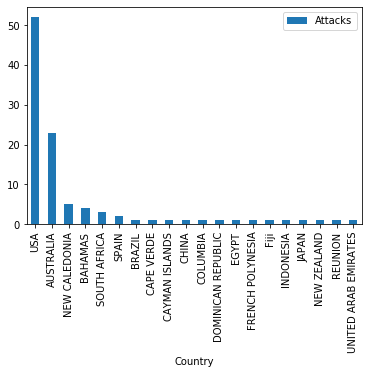

In [45]:
y_2016.plot(kind='bar')

In [16]:
top_20_c = country_df.sort_values(by='attacks', ascending=False).head(20)

In [17]:
display(top_20_c)

,country,attacks
196,USA,2116
12,AUSTRALIA,1279
164,SOUTH AFRICA,565
141,PAPUA NEW GUINEA,133
123,NEW ZEALAND,125
21,BRAZIL,102
14,BAHAMAS,98
109,MEXICO,81
86,ITALY,71
57,FIJI,62


In [18]:
index = []
for i in range(1,21):
    index.append(i)

In [19]:
print(index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [20]:
top_20_c.index = index

In [21]:
display(top_20_c)

,country,attacks
1,USA,2116
2,AUSTRALIA,1279
3,SOUTH AFRICA,565
4,PAPUA NEW GUINEA,133
5,NEW ZEALAND,125
6,BRAZIL,102
7,BAHAMAS,98
8,MEXICO,81
9,ITALY,71
10,FIJI,62


In [22]:
country_df.describe()

,attacks
count,203.000000
mean,29.305419
std,177.401891
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,2116.000000
